<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание таблиц

# Table recognition


В этом уроке мы научимся распознавать структурированные таблицы. 

In this lesson we will learn how to recognize structured tables. 

На первый взгляд эта задача кажется простой, но, увы, это не так. Распознавание данных с несколькими столбцами более требовательно, чем
другие задачи OCR, однако по прежнему решаемо, особенно при условии, что вы используете правильные алгоритмы.



At first glance, this task seems easy, but alas, it is not. Recognizing data with multiple columns is more demanding than
The recognition of multi-column data is more demanding than the other OCR tasks, but still manageable, especially if you use the right algorithms.


В этом уроке мы будем использовать **pandas** для структурирования таблицы, **tabulate** для красивого вывода ее ну и **tesseract** для успешного распознавания. 

In this lesson we will use **pandas** to structure the table, **tabulate** to output it nicely, and **tesseract** for successful recognition. 

Так же разберемся что такое **иерархическая агломеративная кластеризация**. 


We will also understand what **hierarchical agglomerative clustering** is. 
 

**План работы:**

**Work plan:**

- Сперва мы производим всяческие преобразования по типу выявления темных областей на светлом фоне, расширение этих областей, чтобы закрыть пробелы между строками текста. First, we do all sorts of transformations like identifying dark areas on a light background, expanding those areas to cover the gaps between the lines of text.



- Учитывая контур, соответствующий таблице tableCnt, мы вычислим ее ограничивающую рамку и извлечем саму таблицу. Given an outline corresponding to tableCnt, we calculate its bounding box and extract the table itself. 


- После нахождения всего текста при помощи тесеракта, мы начинаем его класстерезировать. After finding all the text using theseract, we start clustering it.


- Мы сформируем правильный кортеж координат (x, y), где устанавливаем y = 0 для каждой записи, так как наша цель сгруппироваться только по координатам x (отделяем каждый столбец таблицы отдельно). We form a proper tuple of coordinates (x, y), where we set y = 0 for each entry, since our goal is to cluster by x coordinates only (we separate each column of the table separately). 

-  Затем  применяется иерархическая агломеративная кластеризация. Then we apply hierarchical agglomerative clustering.



> **Кластер** - это множество образов объектов одного класса. **Cluster** is a set of images of objects of the same class.

> **Агломеративный подход** подразумевает под собой объединение этих кластеров. **Agglomerative approach** implies combining these clusters.


Мы будем использовать уже встроенный метод в sklearn `AgglomerativeClustering`, чтобы объединять класстеры в одну общую таблицу (если они относятся к ней). Более детально вы можете ознакомиться с этим медотом в официальной документации [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)


We will use the already built-in method in sklearn `AgglomerativeClustering` to merge the clusters into one common table (if they belong to one). You can read more details about this method in the official documentation [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)


Если мы позволим кластеризации продолжаться бесконечно, то в итоге получим один кластер, который содержит все точки данных.

If we allow clustering to continue indefinitely, we will end up with one cluster that contains all data points.

Поэтому будем так же использовать пороговое значение расстояния, чтобы вовремя остановить процесс кластеризации.

Therefore, we will also use a distance threshold to stop the clustering process in time.

Чтобы понять, какое значение наиболее оптимально для ваших целей, необходимо изучить данные изображения, с которым мы работаем.Чуть позже мы рассмотрим этот процесс детальнее. 







To understand what value is optimal for your purposes, it is necessary to study the data of the image we are working with.A little later we will consider this process in more detail. 





- В качестве метрики расстояния мы будем использовать манхэттенскую метрику  расстояния. Можно так же попробовать использовать другие метрики, например, евклидово расстояние, но эта является наиболее удачной. We will use the Manhattan distance metric as the distance metric. You can also try to use other metrics, such as Euclidean distance, but this one is the most successful. 


- Находим индексы  всех точек данных, принадлежащих текущей метке кластера и сортируем их сверху вниз. Find indices of all data points that belong to the current cluster label and sort them from top to bottom.


- После извлечения текущего столбеца, мы создаем для него отдельный фрейм данных и записываем в общую таблицу. After extracting the current column, we create a separate data frame for it and write it to the overall table.

In [1]:

# установим и распакуем архив
# install and unpack the archive
!wget http://dataudt.ru/datasets/cv/Lesson_15.Recognizing_tables.zip
!unzip -qq Lesson_15.Recognizing_tables.zip
%cd Recognizing_tables

--2022-02-10 07:41:02--  http://dataudt.ru/datasets/cv/Lesson_15.Recognizing_tables.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... failed: Connection timed out.
Retrying.

--2022-02-10 07:43:12--  (try: 2)  http://dataudt.ru/datasets/cv/Lesson_15.Recognizing_tables.zip
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14323829 (14M) [application/zip]
Saving to: ‘Lesson_15.Recognizing_tables.zip’

Lesson_15.Recognizi 100%[===================>]  13.66M  4.31MB/s    in 3.2s    

2022-02-10 07:43:16 (4.31 MB/s) - ‘Lesson_15.Recognizing_tables.zip’ saved [14323829/14323829]

/content/Recognizing_tables


Установим tabulate, чтобы потом распечатать красиво отформатированную таблицу данных в терминале


Let's set tabulate to print a nicely formatted data table in the terminal afterwards

In [2]:
!pip install tabulate

Настроим работу tesseract 

Let's set up a tesseract 


In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [4]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [5]:
# для русского языка
# for Russian 
!mv "/content/Recognizing_tables/rus.traineddata" "/usr/share/tesseract-ocr/4.00/tessdata/"

In [6]:
# импортируем необходимые пакеты
# import the necessary packages
from sklearn.cluster import AgglomerativeClustering
from google.colab.patches import cv2_imshow
from pytesseract import Output
from tabulate import tabulate
import pandas as pd
import numpy as np
import pytesseract
import imutils
import cv2

In [7]:
# создадим отдельный словарь с аргументами 
# create a separate dictionary with arguments 


args = {
  "image" : "/content/Recognizing_tables/ex1.png", # путь к входному изображению, которое мы будем распознавать
                                                    # the path to the input image we are going to recognize
  "output": 'table.scv', # путь к выходному CSV-файлу
                        # path to the output CSV file
  "min-conf":2, # минимальное значение достоверности для фильтрации слабого обнаружения текста
                # minimum validity value to filter out weak text detection
  "dist-thresh":40.0, # пороговое отсечение расстояния для кластеризации
                        # threshold distance cutoff for clustering
  "min-size":2 # минимальный размер кластера (т.е. количество записей в столбце)
                # minimum cluster size (i.e. number of records per column)
}



Чем больше расстояние между текстом в ячейках в исходном изображении, тем больше должен быть `--dist-thresh`

The greater the distance between the text in the cells in the original image, the greater the `--dist-thresh` should be.

Правильная настройка  `--dist-thresh` имеет первостепенное значение для распознавания многоколоночных данных, поэтому обязательно поэкспериментируйте с различными значениями.





The correct setting of `--dist-thresh` is of paramount importance for the recognition of multi-column data, so be sure to experiment with different values.

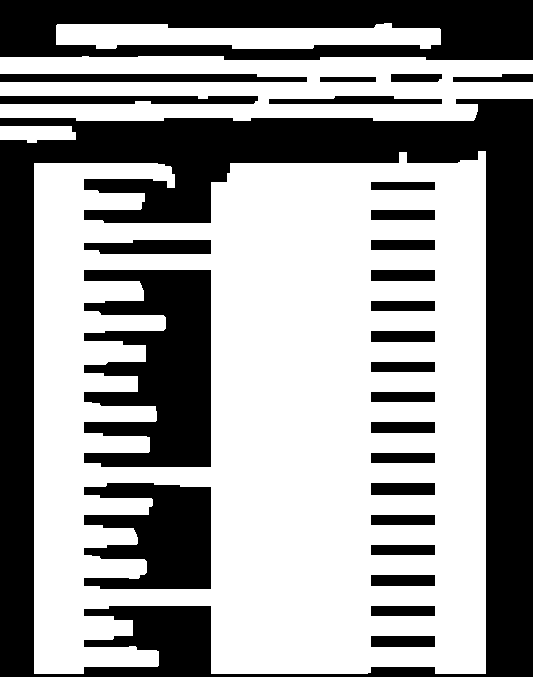

In [8]:

# устанавливаем сид, чтобы постоянно генерировались
# одни и те же значения,
# чтобы потом мы могли генерировать 
# цвета для каждого столбца текста
# set a seed for our random number generator
np.random.seed(42)

# загружаем входное изображение и преобразуем его 
# в градации серого цвета
# load the input image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# инициализируем прямоугольное ядро, ширина которого в ~5 раз больше высоты, 
# затем сглаживаем изображение с помощью гауссова размытия 3x3, 
# а затем применяем MORPH_BLACKHAT для поиска 
# темных областей на светлом фоне
# initialize a rectangular kernel that is ~5x wider than it is tall,
# then smooth the image using a 3x3 Gaussian blur and then apply a
# blackhat morpholigical operator to find dark regions on a light
# background
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (51, 11))
gray = cv2.GaussianBlur(gray, (3, 3), 0)
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

# вычисляем градиент Шарра изображения blackhat
# и масштабируем результат в диапазоне [0, 255]
# compute the Scharr gradient of the blackhat image and scale the
# result into the range [0, 255]
grad = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
grad = np.absolute(grad)
(minVal, maxVal) = (np.min(grad), np.max(grad))
grad = (grad - minVal) / (maxVal - minVal)
grad = (grad * 255).astype("uint8")

# применяем операцию закрытия с использованием прямоугольного ядра,
# чтобы закрыть пробелы между строками текста в таблице. 
# Применяем метод порогового выделения Оцу и, наконец,
# операцию расширения для увеличения областей переднего плана
# apply a closing operation using the rectangular kernel to close
# gaps in between characters, apply Otsu's thresholding method, and
# finally a dilation operation to enlarge foreground regions
grad = cv2.morphologyEx(grad, cv2.MORPH_CLOSE, kernel)
thresh = cv2.threshold(grad, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = cv2.dilate(thresh, None, iterations=3)

cv2_imshow(thresh)

Input


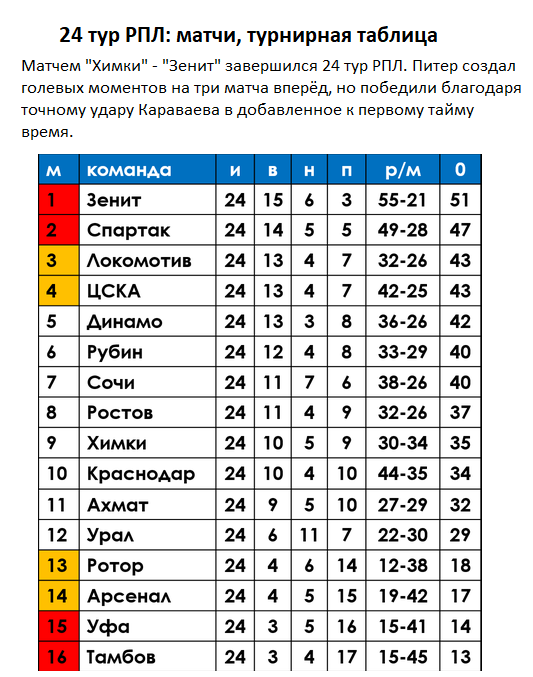

Table


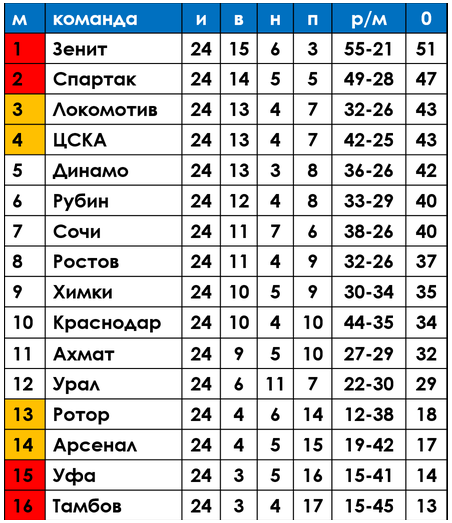

In [9]:

# находим контуры на пороговом изображении и захватываем самый большой из них,
# который, как мы предполагаем, является таблицей
# find contours in the thresholded image and grab the largest one,
# which we will assume is the stats table
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
tableCnt = max(cnts, key=cv2.contourArea)

# вычисляем координаты ограничивающей рамки таблицы 
# и извлекаем таблицу из входного изображения
# compute the bounding box coordinates of the stats table and extract
# the table from the input image
(x, y, w, h) = cv2.boundingRect(tableCnt)
table = image[y:y + h, x:x + w]

# показываем исходное входное изображение и
#  извлеченную таблицу на нашем экране
# show the original input image and extracted table to our screen
print("Input")
cv2_imshow(image)
print("Table")
cv2_imshow(table)

+----+------+-----------+-----+-----+------+-------+-----+
|    | 10   | команда   |   и | ы   | 10   | р/м   |   о |
|----+------+-----------+-----+-----+------+-------+-----|
|  0 | 11   | Зенит     |  24 | 15  | 10   | 55-21 |  51 |
|  1 | 12   | Спартак   |  24 | 14  | 14   | 49—28 |  47 |
|  2 |      | Локомотив |  24 | 13  | 15   | 32—26 |  43 |
|  3 |      | ЦСКА      |  24 | 13  | 16   | 42—25 |  43 |
|  4 |      | Динамо    |  24 | 13  | 17   | 36—26 |  42 |
|  5 |      | Рубин     |  24 | 12  |      | 33—29 |  40 |
|  6 |      | Сочи      |  24 | 11  |      | 38-26 |  40 |
|  7 |      | Ростов    |  24 | 11  |      | 32—26 |  37 |
|  8 |      | Химки     |  24 | 10  |      | 30-34 |  35 |
|  9 |      | Краснодар |  24 | 10  |      | 44-35 |  34 |
| 10 |      | Ахмат     |  24 | 11  |      | 27-29 |  32 |
| 11 |      | Ypaa      |  24 |     |      | 22-30 |  29 |
| 12 |      | Potop     |  24 |     |      | 12-38 |  18 |
| 13 |      | Арсенал   |  24 |     |      | 19—42 |  17

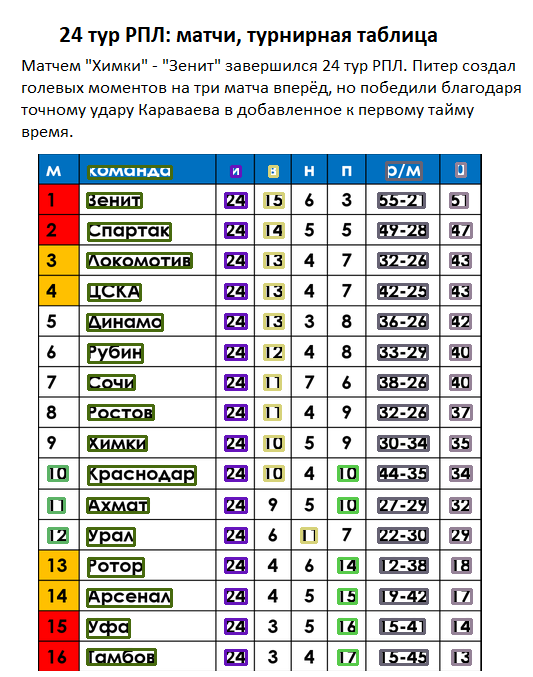

In [10]:
#  устанавливаем режим PSM для обнаружения разреженного текста, 
# а затем локализуем текст в таблице
# мы используем 11 режим, так как  он используется при 
# обнаружении разреженного текста. Возможно, у вас 11
# режим будет работать не самым лучшим способом. В таком
# случае попробуйте использовать 6 (текст представляет 
# собой единый однородный блок текста)
# set the PSM mode to detect sparse text, and then localize text in
# the table
options = "--psm 11"
results = pytesseract.image_to_data(
	cv2.cvtColor(table, cv2.COLOR_BGR2RGB),
	config=options,
	output_type=Output.DICT, lang='rus+eng')

# инициализируем список для хранения (x, y)-координат
# обнаруженного текста вместе с самим OCR's текстом
# initialize a list to store the (x, y)-coordinates of the detected
# text along with the OCR'd text itself
coords = []
ocrText = []

# перебираем каждый отдельный кусок текста 
# loop over each of the individual text localizations
for i in range(0, len(results["text"])):
    # извлекаем координаты ограничивающей  рамки
    # текстовой области из текущего результата
    # extract the bounding box coordinates of the text region from
    # the current result
    x = results["left"][i]
    y = results["top"][i]
    w = results["width"][i]
    h = results["height"][i]

    # извлекаем сам текст OCR вместе с уверенностью в локализации текста
    # extract the OCR text itself along with the confidence of the
    # text localization
    text = results["text"][i]
    conf = int(results["conf"][i])

    # отфильтровываем текстовые локализации со слабой вероятностью 
    # filter out weak confidence text localizations
    if conf > args["min-conf"]:
        # обновляем координаты ограничищающей 
        # рамки текста и найденный текст
        # update our text bounding box coordinates and OCR'd text,
        # respectively
        coords.append((x, y, w, h))
        ocrText.append(text)

# извлекаем все x-координаты из текстовых границ, 
# устанавливая значение y-координаты равным нулю
# extract all x-coordinates from the text bounding boxes, setting the
# y-coordinate value to zero
xCoords = [(c[0], 0) for c in coords]

# применяем иерархическую агломеративную кластеризацию к координатам
# apply hierarchical agglomerative clustering to the coordinates
clustering = AgglomerativeClustering(
	n_clusters=None,
	affinity="manhattan",
	linkage="complete",
	distance_threshold=args["dist-thresh"])
clustering.fit(xCoords)

# инициализируем список отсортированных кластеров
# initialize our list of sorted clusters
sortedClusters = []

# перебираем все кластеры
# loop over all clusters
for l in np.unique(clustering.labels_):
    # извлекаем индексы для координат, 
    # принадлежащих текущему кластеру
    # extract the indexes for the coordinates belonging to the
	# current cluster
	idxs = np.where(clustering.labels_ == l)[0]

    # проверяем, что кластер достаточно большой
    # verify that the cluster is sufficiently large
	if len(idxs) > args["min-size"]:
        # вычисляем среднее значение x-координаты кластера
        # и обновляем наш список кластеров с текущей меткой 
        # и средней x-координатой
        # compute the average x-coordinate value of the cluster and
		# update our clusters list with the current label and the
		# average x-coordinate
		avg = np.average([coords[i][0] for i in idxs])
		sortedClusters.append((l, avg))

# сортируем кластеры по их средней координате x 
# и инициализируем рамку с данными 
# sort the clusters by their average x-coordinate and initialize our
# data frame
sortedClusters.sort(key=lambda x: x[1])
df = pd.DataFrame()

# снова перебираем кластеры, на этот раз в
#  отсортированном порядке
# loop over the clusters again, this time in sorted order
for (l, _) in sortedClusters:
    # извлекаем индексы для координат, 
    # принадлежащих текущему кластеру
    # extract the indexes for the coordinates belonging to the
    # current cluster
    idxs = np.where(clustering.labels_ == l)[0]

    # извлекаем координаты y из элементов
    #  в текущем кластере, затем сортируем их сверху вниз
    # extract the y-coordinates from the elements in the current
    # cluster, then sort them from top-to-bottom
    yCoords = [coords[i][1] for i in idxs]
    sortedIdxs = idxs[np.argsort(yCoords)]

    # генерируем случайный цвет для кластера
    # generate a random color for the cluster
    color = np.random.randint(0, 255, size=(3,), dtype="int")
    color = [int(c) for c in color]

    # перебираем отсортированные индексы
    # loop over the sorted indexes
    for i in sortedIdxs:
        # извлекаем координаты ограничивающей рамки текста
        #  и рисуем ее вокруг текущего элемента
        # extract the text bounding box coordinates and draw the
        # bounding box surrounding the current element
        (x, y, w, h) = coords[i]
        cv2.rectangle(table, (x, y), (x + w, y + h), color, 2)

    # извлекаем текст для текущего столбца, 
    # затем строим таблицу для данных,
    #  где первая запись в нашем столбце является заголовком
    # extract the OCR'd text for the current column, then construct
    # a data frame for the data where the first entry in our column
    # serves as the header
    cols =  [ocrText[i].strip() for i in sortedIdxs]
    currentDF = pd.DataFrame({cols[0]: cols[1:]})

    # добавляем новые данные путем конкатенации  
    # фреймов данных. Делаем это для обработки столбцов,
    # которые могут иметь различное количество строк
    # concatenate *original* data frame with the *current* data
    # frame (we do this to handle columns that may have a varying
    # number of rows)
    df = pd.concat([df, currentDF], axis=1)

# заменяем значения NaN пустой строкой 
# и затем показываем красиво отформатированную версию
#  нашего многоколоночного распознанного текста
# replace NaN values with an empty string and then show a nicely
# formatted version of our multi-column OCR'd text
df.fillna("", inplace=True)
print(tabulate(df, headers="keys", tablefmt="psql"))

# записываем нашу таблицу на диск в виде CSV-файла
# write our table to disk as a CSV file
print("[INFO] saving CSV file to disk...")
df.to_csv(args["output"], index=False)

# выводим итоговое изображение с распознанными данными
# show the output image after performing multi-column OCR
print("Output")
cv2_imshow(image)

Результаты вышли не идеальными даже после долгой настройки, но мы мало что можем с этим поделать, поскольку это проблема Тессеракта, а не нашего алгоритма группировки столбцов.


The results are not perfect even after a long adjustment, but there is not much we can do about it, since this is a Tesseract problem, not our column-grouping algorithm.